# 无监督 聚类算法KMeans

### 簇与质心
KMeans算法将一组N个样本的特征矩阵X划分为K个无交集的簇，直观上来看是簇是一组一组聚集在一起的数据，在一个簇中的数据就认为是同一类。簇就是聚类的结果表现。

簇中所有数据的均值 通常被称为这个簇的“质心”(centroids)。在一个二维平面中，一簇数据点的质心的 横坐标就是这一簇数据点的横坐标的均值，质心的纵坐标就是这一簇数据点的纵坐标的均值。同理可推广至高 维空间。

#### 过程
先随机选取 K 个点作为质心，然后分别计算每个点到这 K 个点的距离，并选取距离最小的质心作为簇的质心，然后分别计算 K 个簇的样本点的均值，以均值作为新的质心，然后重复上述步骤，直至质心不再变化为止。

如我们采用欧几里得距离，则一个簇中所有样本点到质心的距离的平方和(Inertia)为:

$$Cluster Sum of Square(CSS) = \sum_{j=0}^{m}{\sum_{i=0}^{n}{(x_i-\mu_i)^2}}\\
Total Cluster Sum of Square = \sum_{l=1}^{k}{CSS_l}$$

KMeans追求的是，求解能够让Inertia最小化的质心,K-Means的求解过程，就变成了一个最优化问题。

**由于KMeans没有参数，因此也没有所谓的损失函数，只能说 Inertia 是 KMeans 的评价指标**

如果距离改成曼哈顿距离，则最优值为中位数，欧几里得距离和余弦距离求得的最优值为均值

#### 时间复杂度
KMeans 的时间复杂度是 $O(k*n*T) $ 其中 $k$ 是超参数(簇数)，$n$ 是样本点个数，$T$ 是迭代次数

在最坏的情况下，KMeans 的时间复杂度为: $O(n^{\frac{k+2}{p}})$

代码：

拿到一组数据，先可视化看一看可以选择的类个数，降到二维(如果可以的话)

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.cm as cm 

创建自己的数据，参数:
- n_samples 数据点个数
- n_features 特征个数
- centers 簇的个数

In [2]:
X, y = make_blobs(n_samples=500, n_features=2, centers=4, random_state=20)

In [3]:
X.shape

(500, 2)

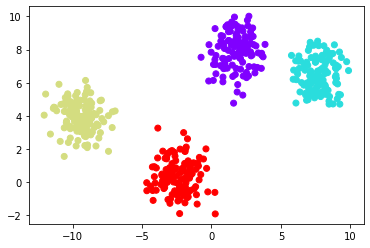

In [4]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y, cmap='rainbow')
plt.show()

In [5]:
clusters = 3

下一行代码是用 X 的数据集计算质心的位置

In [6]:
cluster = KMeans(n_clusters=clusters, random_state=20).fit(X)

查看质心

In [7]:
cluster.cluster_centers_

array([[-9.41580569,  3.90052684],
       [ 4.75587612,  7.20398523],
       [-2.39719277,  0.36758429]])

查看总距离平方和

In [8]:
cluster.inertia_

3260.830162096074

In [9]:
y_predit = cluster.labels_
y_predit

array([2, 2, 0, 2, 1, 2, 0, 0, 2, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 0, 1, 1, 1, 2, 2, 1, 0, 2,
       1, 0, 2, 1, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0,
       1, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 2, 0, 2, 1, 1, 2, 0, 1, 0, 1,
       0, 2, 2, 2, 1, 2, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2,
       1, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 2, 0, 1,
       1, 1, 2, 1, 1, 0, 1, 2, 1, 1, 0, 1, 1, 1, 1, 2, 0, 2, 0, 1, 2, 2,
       2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2, 0, 1, 1, 2, 1,
       1, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1,
       1, 0, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1, 2, 0,
       1, 1, 0, 2, 2, 0, 2, 0, 0, 0, 1, 0, 1, 2, 1, 2, 0, 0, 0, 2, 1, 1,
       2, 1, 1, 2, 1, 1, 0, 1, 0, 2, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 2, 1,
       1, 0, 0, 2, 2, 0, 1, 1, 2, 1, 1, 0, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 1, 0, 2, 0, 0, 2, 1, 2, 1, 1, 2, 1, 0, 0,

下面一行代码是用已经计算好的质心来对一组数据进行分簇

In [10]:
pre = cluster.fit_predict(X)

In [11]:
pre == y_predit

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

#### 当数据量特别大的时候，一般先对数据进行切片，选出少量数据进行 fit，得到质心后在用 predict 对全部数据进行分簇

查看当超参数 K 设置为3时，分类的情况

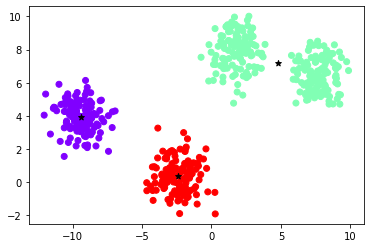

In [12]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y_predit, cmap='rainbow')
plt.scatter(cluster.cluster_centers_[:,0], cluster.cluster_centers_[:,1], c='black', marker='*',)
plt.show()

如果超参数 K 为 4 呢？

In [13]:
cluster = KMeans(n_clusters=4, random_state=20)
y_p4 = cluster.fit_predict(X)

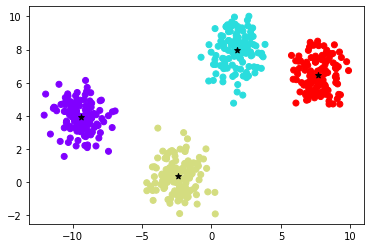

In [14]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y_p4, cmap='rainbow')
plt.scatter(cluster.cluster_centers_[:,0], cluster.cluster_centers_[:,1], c='black', marker='*',)
plt.show()

In [15]:
cluster.inertia_

954.0226519487762

可见，此时的 Inertia 值 954 比刚才的三千多小多了

**但是，并不是 Inertia 越小越好，如果将 K 设置为 500，则 Inertia 会为零，相当于每个点为一个簇，距离平方和为零，由此可见，Inertia 并不是KMeans 的评估指标，那评估指标是什么呢？**

### 评估指标
KMeans 的最初目标就是簇内差异小，簇间差异大，因此**可以通过衡量簇内差异来衡量聚类的效果**

#### 当标签已知时
- 互信息分 (0,1) 取值越大越好
- V-measure (0,1) 取值越大越好
- 调整兰德系数 (-1,1) 取值越大越好

#### 当标签未知时
- **轮廓系数** 用两个指标来同时评估簇内差异和簇间差异
 * a: 样本与其自身所在的簇中的其他样本的相似度，等于样本与同一簇中所有其他点之间的平均距离
 * b: 样本与其他簇中的样本的相似度b，等于样本与下一个最近的簇中的所有点之间的平均距离
 
我们希望 b 大于 a，且大的越多越好，单个样本轮廓系数为：

$$s = \frac{b-a}{\max{(a,b)}}$$

上式可被解释为：
$$
\begin{cases}
1-\frac{a}{b},& if(a < b)\\
0,& if(a = b)\\
\frac{b}{a}-1,& if(a > b)
\end{cases}
$$

根据上式，轮廓系数在(0,1)表示聚类好，当轮廓系数为负数的时候证明聚类效果不好

**轮廓系数**

In [16]:
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score

计算每个样本的轮廓系数

In [17]:
silhouette_samples(X,y_predit).shape

(500,)

计算总轮廓系数

In [18]:
silhouette_score(X,y_predit)

0.6870533633785876

In [19]:
silhouette_score(X,y_p4)

0.7424700342684403

可见当超参数 K 设置为4时的总轮廓系数比 K 等于三时更接近于 1，证明 K = 4 效果更好。

#### 当标签未知时
- **卡林斯基-哈拉巴斯指数(Calinski-Harabaz Index，简称CHI，方差比标准)** 计算公式如下：

$$s(k)=\frac{Tr(B_k)}{Tr(W_k)} * \frac{N-k}{k-1}$$

其中，$N$ 为样本个数，$k$ 为簇的个数，$B_k$ 是组间离散矩阵，即不同簇之间的协方差矩阵，$W_k$ 是簇内离散矩阵，即一个簇内数据的协方差矩阵，$Tr$ 表示矩阵的迹。数据间的离散程度越高，协方差矩阵的迹就会更大。

组内离散程度低，协方差的迹就会越小，$Tr(W_k)$ 也就越小，同时，组间离散程度大，协方差的的迹也会越大，$Tr(B_k)$ 就越大，因此Calinski-harabaz指数越高越好。

**优点；快！**

In [20]:
from sklearn.metrics import calinski_harabasz_score

In [21]:
calinski_harabasz_score(X,y_predit)

1621.9045565523804

In [22]:
calinski_harabasz_score(X,y_p4)

4088.094547066805

可见，簇数选择 4 比 3 更好。

究竟比轮廓系数快多少？

In [23]:
from time import time

In [24]:
t0 = time()
calinski_harabasz_score(X,y_p4)
t1 = time() - t0

t0 = time()
silhouette_score(X,y_p4)
t2 = time() - t0

print('calinski harabasz time ->{}\nsilhouette time        ->{}'.format(t1,t2))

calinski harabasz time ->0.00403285026550293
silhouette time        ->0.014999866485595703


**时间的格式化**

In [25]:
import datetime

In [26]:
datetime.datetime.fromtimestamp(t0).strftime("%Y-%m-%d %H:%M:%S")

'2021-10-09 22:15:39'

### 基于轮廓系数选择最优的n_clusters
- 查看聚类后的轮廓系数和类之间的轮廓系数的对比
- 聚类完毕后的图像分布情况

以 K = 4 为例：

for 4 cluster, the average silhouette scorce is 0.7424700342684403


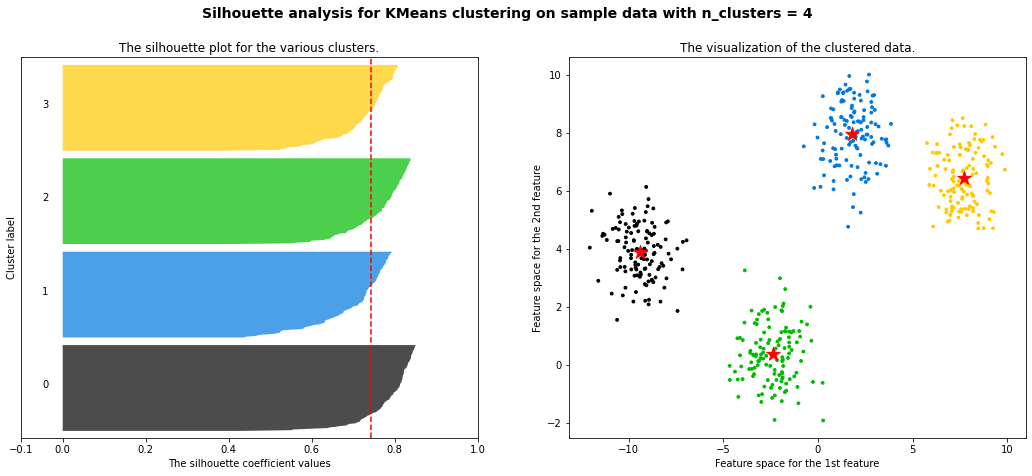

In [27]:
# 创建画布和子图，设置大小

cluster_num = 4
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(18,7)

# 设置子图一的横纵坐标，横坐标从 0 开始，纵坐标希望每个柱之间有点空隙，所以加上一个值

ax1.set_xlim([-0.1,1])
ax1.set_ylim([0,X.shape[0] + (cluster_num + 1) * 10])

# 创建聚类对象，得到分类标签、轮廓系数等

cluster = KMeans(n_clusters=cluster_num, random_state=20).fit(X)
cluster_labels = cluster.labels_

silhouette_avg = silhouette_score(X,cluster_labels)
print('for {} cluster, the average silhouette scorce is {}'.format(cluster_num, silhouette_avg))

samples_silhouette_values = silhouette_samples(X,cluster_labels)

# 第一个子图：

y_begin = 10

for i in range(cluster_num):
    ith_cluster_silhouette_values = samples_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort() # 复制一下，防止覆盖原数据
    ith_cluster_size = ith_cluster_silhouette_values.shape[0]
    y_upper = y_begin + ith_cluster_size
    
    color = cm.nipy_spectral(float(i)/cluster_num)
    
    ax1.fill_betweenx(np.arange(y_begin, y_upper),
                     ith_cluster_silhouette_values,
                     facecolor = color,
                     alpha = 0.7)
    
    ax1.text(-0.05, y_begin + 0.5*ith_cluster_size, str(i))
    
    y_begin = y_upper + 10
    
ax1.set_title("The silhouette plot for the various clusters.") 
ax1.set_xlabel("The silhouette coefficient values") 
ax1.set_ylabel("Cluster label")

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 处理第二个子图
colors = cm.nipy_spectral(cluster_labels.astype(float) / cluster_num)
ax2.scatter(X[:, 0], X[:, 1] ,marker='o', s=8, c=colors)
centers = cluster.cluster_centers_

ax2.scatter(centers[:, 0], centers[:, 1], marker='*',
            c="red", alpha=1, s=200)
ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")
plt.suptitle(("Silhouette analysis for KMeans clustering on sample data " "with n_clusters = %d" % cluster_num),
             fontsize=14, fontweight='bold')
plt.show()

将上面的代码放入方法中，并分别看不同簇的情况

for 2 cluster, the average silhouette scorce is 0.6310902953569432


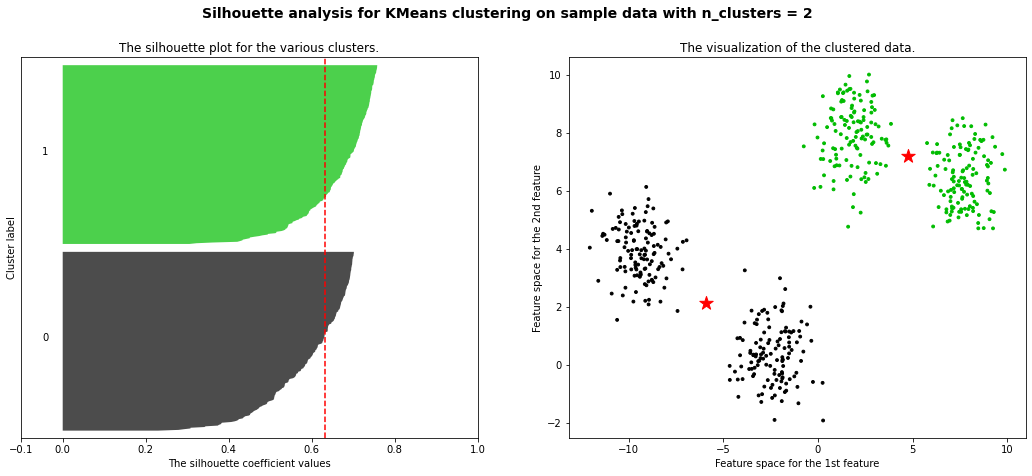

for 3 cluster, the average silhouette scorce is 0.6870533633785876


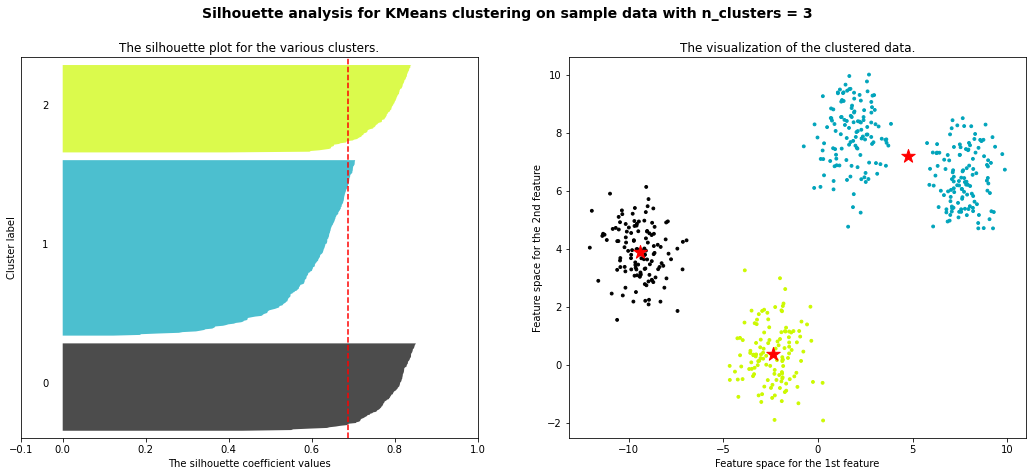

for 4 cluster, the average silhouette scorce is 0.7424700342684403


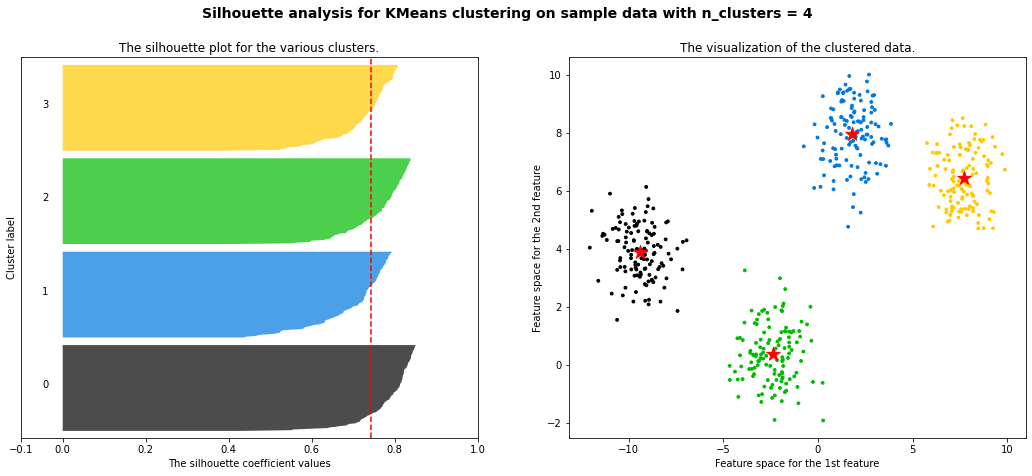

for 5 cluster, the average silhouette scorce is 0.6514199017745737


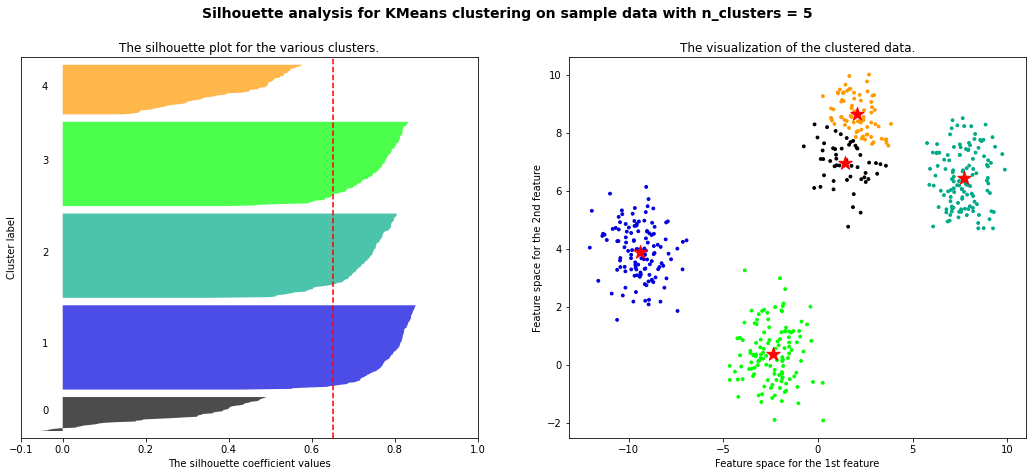

for 6 cluster, the average silhouette scorce is 0.5369979046654769


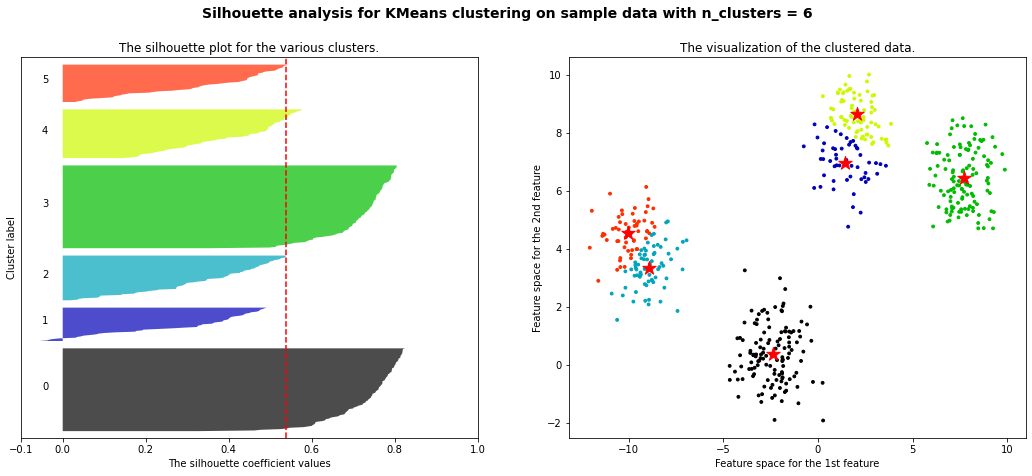

for 7 cluster, the average silhouette scorce is 0.45850609619695254


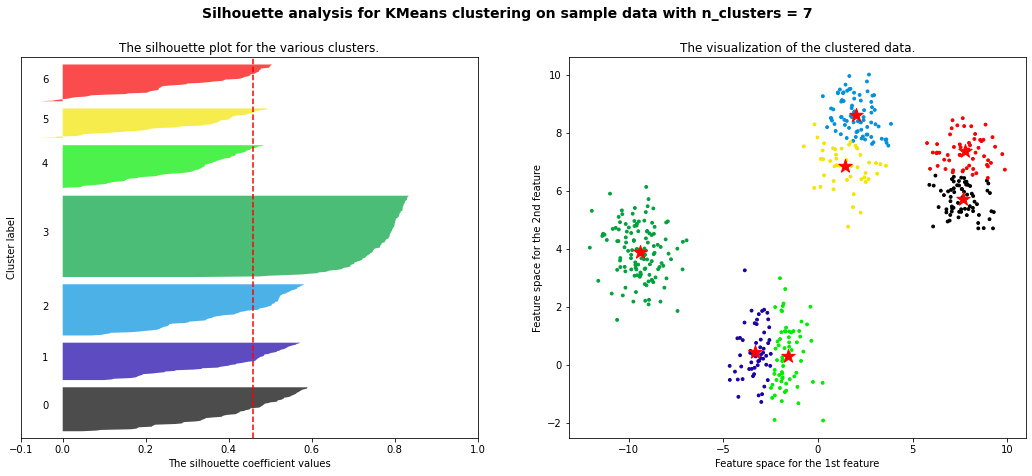

In [28]:

for cluster_num in [2,3,4,5,6,7]:
# 创建画布和子图，设置大小
    fig, (ax1,ax2) = plt.subplots(1,2)
    fig.set_size_inches(18,7)

    # 设置子图一的横纵坐标，横坐标从 0 开始，纵坐标希望每个柱之间有点空隙，所以加上一个值

    ax1.set_xlim([-0.1,1])
    ax1.set_ylim([0,X.shape[0] + (cluster_num + 1) * 10])

    # 创建聚类对象，得到分类标签、轮廓系数等

    cluster = KMeans(n_clusters=cluster_num, random_state=20).fit(X)
    cluster_labels = cluster.labels_

    silhouette_avg = silhouette_score(X,cluster_labels)
    print('for {} cluster, the average silhouette scorce is {}'.format(cluster_num, silhouette_avg))

    samples_silhouette_values = silhouette_samples(X,cluster_labels)

    # 第一个子图：

    y_begin = 10

    for i in range(cluster_num):
        ith_cluster_silhouette_values = samples_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort() # 复制一下，防止覆盖原数据
        ith_cluster_size = ith_cluster_silhouette_values.shape[0]
        y_upper = y_begin + ith_cluster_size

        color = cm.nipy_spectral(float(i)/cluster_num)

        ax1.fill_betweenx(np.arange(y_begin, y_upper),
                         ith_cluster_silhouette_values,
                         facecolor = color,
                         alpha = 0.7)

        ax1.text(-0.05, y_begin + 0.5*ith_cluster_size, str(i))

        y_begin = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.") 
    ax1.set_xlabel("The silhouette coefficient values") 
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 处理第二个子图
    colors = cm.nipy_spectral(cluster_labels.astype(float) / cluster_num)
    ax2.scatter(X[:, 0], X[:, 1] ,marker='o', s=8, c=colors)
    centers = cluster.cluster_centers_

    ax2.scatter(centers[:, 0], centers[:, 1], marker='*',
                c="red", alpha=1, s=200)
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data " "with n_clusters = %d" % cluster_num),
                 fontsize=14, fontweight='bold')
    plt.show()

可以看到，当分类为 2 时，每一个簇只有一小部分过了平均线，其他部分都在拖后腿。

当分类为 3 时，中间一类基本没有超过平均。

当分类为 4 时，每个簇都有超过半数过了平均线，是最合理的分类。

当分类为 5、6、7 时，都出现了存在类别在平均线以后的情况，而且甚至还出现了部分负值。

### 初始质心怎么选？
因为在 KMeans 中，初始质心的选择直接决定了迭代次数。
- init 参数
 * 默认k-means++，是使得初始质心(通常)彼此远离，以此来引导出比随机初始化更可靠的结果
 * random 随机
 * n 维数组 维度为(n_clusters，n_features)
- n_init 参数，随机选择质心的次数，默认 10，即随机十次用最优的作为质心

In [29]:
plus = KMeans(n_clusters=10).fit(X)
plus.n_iter_

11

In [30]:
random = KMeans(n_clusters=10, init='random', random_state=20).fit(X)
random.n_iter_

10

### 让迭代提前停下来
- max_iter 最大迭代次数，有时候迭代多了反而不好
- tol 浮点数，默认1e-4，是两次间迭代 Inertia 下降的量，当两次迭代间下降的量小于 tol 时，迭代停止。

### 函数cluster.k_means
直接返回质心、标签、Inertia、最佳迭代次数

In [31]:
from sklearn.cluster import k_means

In [32]:
k_means(X,4,return_n_iter=True)

(array([[-9.41580569,  3.90052684],
        [ 1.81343436,  7.95848276],
        [-2.39719277,  0.36758429],
        [ 7.69831787,  6.44948769]]),
 array([2, 2, 0, 2, 1, 2, 0, 0, 2, 1, 3, 0, 1, 0, 0, 1, 3, 3, 1, 0, 3, 1,
        1, 0, 2, 1, 2, 3, 2, 2, 2, 2, 1, 3, 2, 0, 3, 3, 3, 2, 2, 1, 0, 2,
        3, 0, 2, 1, 0, 2, 0, 0, 0, 1, 0, 1, 0, 3, 0, 0, 2, 0, 0, 0, 1, 0,
        3, 2, 0, 3, 0, 1, 1, 0, 0, 1, 0, 3, 2, 0, 2, 1, 1, 2, 0, 3, 0, 1,
        0, 2, 2, 2, 3, 2, 3, 1, 0, 1, 0, 0, 0, 3, 0, 1, 3, 3, 0, 0, 3, 2,
        3, 2, 0, 0, 3, 0, 0, 0, 1, 1, 2, 3, 0, 1, 3, 2, 3, 3, 3, 2, 0, 3,
        3, 3, 2, 1, 1, 0, 3, 2, 1, 1, 0, 3, 3, 1, 1, 2, 0, 2, 0, 1, 2, 2,
        2, 3, 3, 1, 2, 2, 1, 2, 2, 2, 3, 2, 0, 2, 3, 2, 2, 0, 3, 3, 2, 1,
        1, 0, 0, 2, 3, 2, 1, 1, 1, 1, 3, 2, 2, 1, 0, 1, 3, 1, 3, 2, 1, 1,
        3, 0, 2, 1, 1, 2, 3, 3, 1, 2, 3, 2, 3, 1, 0, 3, 3, 0, 1, 1, 2, 0,
        1, 1, 0, 2, 2, 0, 2, 0, 0, 0, 1, 0, 1, 2, 1, 2, 0, 0, 0, 2, 3, 1,
        2, 1, 3, 2, 3, 1, 0, 3, 0, 2, 3,

## 案例：聚类算法用于降维，KMeans的矢量量化应用

K-Means聚类最重要的应用之一是非结构数据(图像，声音)上的矢量量化(VQ)。

将非结构化、占空间较多的文件数据在保证质量的前提下缩小大小。

矢量量化就可以实现这个目的。KMeans聚类的矢量量化本质是一种降维运用，但它与之前的降维算法的思路不相同。特征选择的降维是直接选取对模型贡献最大的特征，PCA的降维是聚合信息，而**矢量量化的降维是在同等样本量上压缩信息的大小**，即不改变特征的数目也不改变样本的数目，只改变在这些特征下的样本上的信息量。

本质上是先聚类，然后用质心这个点的信息近似代替这个簇的点的信息

In [33]:
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle

导入数据

In [34]:
picture = load_sample_image("china.jpg")
picture.shape

(427, 640, 3)

In [35]:
picture.dtype

dtype('uint8')

有多少种不同颜色？

In [36]:
newimage = picture.reshape(427*640, 3)
pd.DataFrame(newimage).drop_duplicates().shape

(96615, 3)

可见有九万多不同的颜色

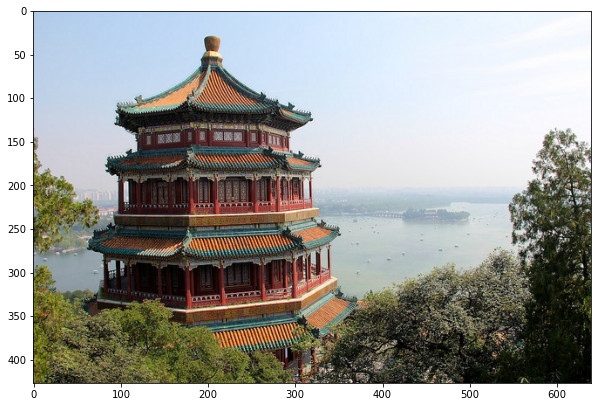

In [37]:
plt.figure(figsize=(10,10))
plt.imshow(picture)
plt.show()

#### 能否应用 KMeans 将颜色的个数从九万多个降低到 64 个，还不太损失图片质量？

In [38]:
clus_num = 64

将 int 类型转成 float 类型，归一化到 0-1 之间

In [39]:
picture = np.array(picture,dtype=np.float64) / picture.max()

保存原始尺寸数据

In [40]:
w,h,d = original_shape = tuple(picture.shape)
print('w:{}\nh:{}\nd:{}\noriginal shape:{}'.format(w,h,d,original_shape))

w:427
h:640
d:3
original shape:(427, 640, 3)


这其中 d 尤其重要，如果 d 搞错了，最后的图像会损失掉大部分的信息，因此有如下语句 assert，意思是如果不等于 3 就会报错

In [41]:
assert d == 3

例子：当tmp_改变时，报错信息会是我们指定的句子

In [42]:
tmp_ = 5
assert tmp_ == 3, 'error! tmp need equal to 5!!!!'

AssertionError: error! tmp need equal to 5!!!!

处理数据成为二维，让 KMeans 可以识别

In [43]:
picture_array = np.reshape(picture, (w*h,d))
picture_array.shape

(273280, 3)

#### 对数据进行K-Means的矢量量化
打乱顺序，取一千个先寻找质心

In [44]:
picture_shuffle = shuffle(picture_array,random_state=20)[:1000]
kmeans = KMeans(n_clusters=clus_num, random_state=20).fit(picture_shuffle)
kmeans.cluster_centers_.shape

(64, 3)

用聚类好的质心去预测所有的点

In [45]:
labels = kmeans.predict(picture_array)
labels.shape

(273280,)

In [47]:
len(set(labels))

64

用质心去替换所有的样本

In [49]:
picture_km = picture_array.copy()
for i in range(w*h):
    picture_km[i] = kmeans.cluster_centers_[labels[i]]

查看替换后的不同颜色个数

In [50]:
pd.DataFrame(picture_km).drop_duplicates().shape

(64, 3)

将替换后的数据转成图片的数据维度

In [51]:
picture_km = picture_km.reshape(w,h,d)
picture_km.shape

(427, 640, 3)

画图对比初始图片和降维后的图片

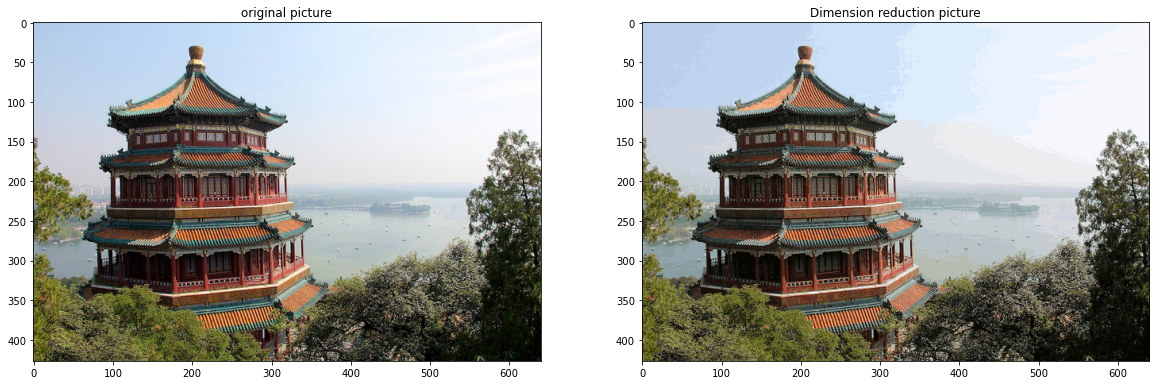

In [57]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(20,10)
ax1.imshow(picture)
ax1.set_title('original picture')
ax2.imshow(picture_km)
ax2.set_title('Dimension reduction picture')
plt.show()

#### 对数据进行随机的矢量量化
随机选择图片中的 64 个点当做质心，然后将所有的点都归类到这 64 个点为质心的簇上

pairwise_distances_argmin 函数的作用是将 picture_array 中的所有点分别计算到 centroid_random 的距离，并选出距离最小的索引保存，返回的数据尺寸为 picture_array 的尺寸

In [58]:
centroid_random = shuffle(picture_array, random_state=20)[:clus_num]
labels_random = pairwise_distances_argmin(centroid_random, picture_array, axis=0)
labels_random.shape

(273280,)

In [59]:
len(set(labels_random))

64

In [61]:
picture_random = picture_array.copy()
for i in range(w*h):
    picture_random[i] = centroid_random[labels_random[i]]
picture_random = picture_random.reshape(w,h,d)
picture_random.shape

(427, 640, 3)

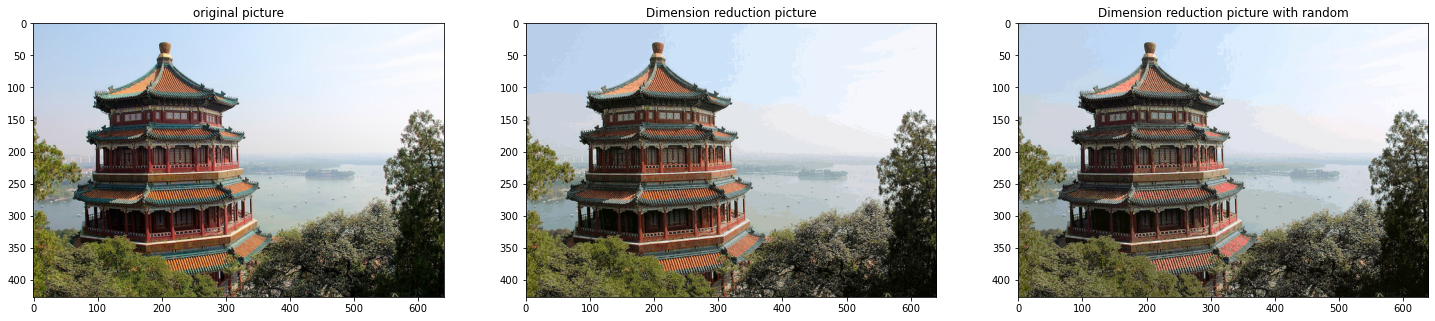

In [64]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_size_inches(25,10)
ax1.imshow(picture)
ax1.set_title('original picture')
ax2.imshow(picture_km)
ax2.set_title('Dimension reduction picture')
ax3.imshow(picture_random)
ax3.set_title('Dimension reduction picture with random')
plt.show()